# Part II - (Prosper Loan Analysis Presentation)
## by (Chisom Nwankwo)

## Investigation Overview

>In this investigation, I wanted to look at the record of loans from Prosper loan that could be used to predict future performance. The records I am interested in for this analysis are:loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower state, amongst others.


## Dataset Overview

> This data set is a record of loans from Prosper Loan in the United States. It contains 113,937 loans with 81 variables on each loan. I have already carried out preliminary cleaning and wrangling, as well as exploratory visualization on the dataset. in this report, I will be focus more on the insights i can gather from this datasets. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# For better assessment set pandasDataFrame not to collapse rows and columns when displaying them
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
#store different color in variables for later use
blue = sb.color_palette()[0]
orange = sb.color_palette()[1]
green =  sb.color_palette()[2]
red = sb.color_palette()[3]
purple = sb.color_palette()[4]
brown = sb.color_palette()[5]
grey = sb.color_palette()[7]

In [4]:
# A function to plot a pie chart
def pie_chart(counts, plot_startangle = 0, bar_counterclock = False, title = None, pfont = 12, 
             title_fontsize = 18, fig_size = (8,8)):
    label = counts.index
    plt.figure(figsize = fig_size);
    plt.pie(counts, startangle = plot_startangle, counterclock = bar_counterclock, autopct='%.3f%%' )
    plt.legend(labels = label, fontsize = pfont, loc= 'center right', bbox_to_anchor =(1.2, 0.5))
    plt.title(title.upper(), fontsize = title_fontsize)
    plt.axis('square');

In [5]:
# define a func to plot hist
def sb_histogram(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, plot_bin_number = 500, color = None, 
              tfont = 12, fig_size = (15,5)):
    plt.figure(figsize=fig_size)
    plot = sb.histplot(data = df, x = xa, bins = plot_bin_number, 
                       color = color)
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont);

In [6]:

# a func to plot a univariate countplot
def bar_chart(df, xa= None, ya = None, title = None, order = None, color = None, 
               tick_rotation = None, pfont = None, tfont = 12, x_label = None, y_label = None, 
               plot_hue = None, title_fontsize = 18, fig_size = (15,5), bartext_fontsize = 12):
    if plot_hue == None:
    #This is for plotting univariate count plots  
    
        plt.rcParams["figure.figsize"] = list(fig_size)
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams['font.size'] = bartext_fontsize
        plot = sb.countplot(data = df, x = xa, y = ya, order = order, color = color)
        for p in plot.patches:
            #plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))
            plot.text(p.get_x(), p.get_height(), '{:.0f}'.format(p.get_height(), va = 'center', ha = 'center',  fontdict = None,))
        plt.title(title) if title == None else plt.title(title.upper(), fontsize = title_fontsize)
        plt.xticks(fontsize = tfont, rotation = tick_rotation)
        plt.yticks(fontsize = tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
        plt.plot()
    else:
        #This would plot bivariate count plots or bar charts
        plt.rcParams["figure.figsize"] = list(fig_size)
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams['font.size'] = bartext_fontsize
        plot = sb.countplot(data = df, hue = plot_hue, x = xa, y = ya, order = order, color = color)
        for p in plot.patches:
            plot.text(p.get_x(), p.get_height(), '{:.0f}'.format(p.get_height(), va = 'center', ha = 'center',  fontdict = None,))
            #plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        plt.title(title) if title == None else plt.title(title.upper(), fontsize = title_fontsize)
        plt.xticks(rotation = tick_rotation)
        plt.xticks(fontsize = 12 if tfont == None else tfont, rotation = tick_rotation)
        plt.yticks(fontsize = 12 if tfont == None else tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont);
        plt.tight_layout()
        plt.plot()
plt.show();

In [7]:
def plot_word_count( text, title = None, pfont = 12, plot_width = None, plot_height= None, plot_margin=None, 
                    prefer_horizontal=0.9,  background_color=None, mode='RGBA', relative_scaling='auto', collocations=True, 
                    colormap=None, normalize_plurals=True,  plot_contour_color='black', x_label = None, y_label = None,
                    max_pfont = 12, fig_size =(15,5)):
    # Generate a word cloud image
    wordcloud = WordCloud(background_color, max_font_size = max_pfont).generate(text)
    plt.figure(figsize= fig_size)
    plt.suptitle('' if title == None else title.upper(), fontsize= pfont)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
    plt.axis('off')
    plt.show();

In [8]:
def sb_scatter_plot(df, xa = None, ya = None, title = None, title_font_size = 18, x_label = None, 
             y_label = None, pfont = 12, color = None, tfont = 12, fig_size = (15,5),
#if you want to plot a regplot, you supply the regplot title and regplot = True
                    reg_plot = False, reg_title = None, plot_hue = None):

    if plot_hue == None:
        plt.figure(figsize=fig_size)
        plot = sb.scatterplot(data = df, x = xa, y = ya)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();
        if reg_plot == True:
            plot = sb.regplot(data = df, x = xa, y = ya)
            plt.title('' if reg_title == None else reg_title.upper(), fontsize = title_font_size)
            plt.xticks(fontsize = tfont)
            plt.yticks(fontsize =  tfont)
            plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
            plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
            plt.show();
    else:
        plt.figure(figsize=fig_size)
        plot = sb.scatterplot(data = df, x = xa, y = ya, hue = plot_hue)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();

In [9]:
# box plots are used to show the relationship between a qualitative and a numerical variable
# xa must be the categorical variable 
'''
Make sure to fill out null values before proceeding to plot your visualizations with this function
The categorical variable must be assigned to the xa
horizontal is used to change the axis of the plot
we can plot univariate box plots by setting the univariate argument to True
'''
def box_plot(df, xa= None, ya = None, title = None, color = None, tick_rotation = None, 
                 pfont = None, tfont =12 , x_label = None, y_label = None, fig_size =(15,10), 
                 horizontal = False, univariate = False, bivariate = False):
    if univariate == True:
        plt.figure(figsize = fig_size)
        sb.boxplot(data = df, x = xa, color = color)
        plt.title(title) if title == None else plt.title(title.upper(), fontsize = 18 if pfont == None else pfont)
        plt.xticks(rotation = tick_rotation)
        plt.xticks(fontsize = 12 if tfont == None else tfont)
        plt.yticks(fontsize = 12 if tfont == None else tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
        plt.tight_layout()
        plt.show();
    elif bivariate == True:
        #Prepare the categorical data for analysis by changing the datatype
        variable_classes = df[xa].unique()
        _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
        df[xa] = df[xa].astype(_classes)    
        if horizontal == True:
                plt.figure(figsize = fig_size)
                sb.boxplot(data = df, y = xa, x = ya, color = color)
                plt.title(title) if title == None else plt.title(title.upper(), fontsize = 18 if pfont == None else pfont)
                plt.xticks(rotation = tick_rotation)
                plt.xticks(fontsize = 12 if tfont == None else tfont)
                plt.yticks(fontsize = 12 if tfont == None else tfont)
                plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
                plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
                plt.tight_layout()
                plt.show();
        else:
                plt.figure(figsize = fig_size)
                sb.boxplot(data = df, x = xa, y = ya)
                plt.title(title) if title == None else plt.title(title.upper(), fontsize = 18 if pfont == None else pfont)
                plt.xticks(rotation = tick_rotation)
                plt.xticks(fontsize = 12 if tfont == None else tfont)
                plt.yticks(fontsize = 12 if tfont == None else tfont)
                plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
                plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
                plt.tight_layout()
                plt.show();
    else:
        return('Warning! please set univariate = True if you are plotting a single variable or bivariate = True for two variables')

    

In [10]:
'''
Make sure to fill out null values before proceeding to plot your visualizations with this function
Plot the categorical variable on the xa
'''
def violin(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                     fig_size = (15,10), tick_rotation = None, univariate = False, bivariate = False):
#the categorical/qualitative variable must be the xa
# we are going to use occupation and estimatedreturn to test this function
#types of occupation 
#Prepare the categorical data for analysis by changing the datatype
    if univariate == True:
        plt.figure(figsize=fig_size)
        sb.violinplot(data= df, x= xa,)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont, rotation = tick_rotation)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();
    elif bivariate == True:
        variable_classes = df[xa].unique()
        _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
        df[xa] = df[xa].astype(_classes)
        plt.figure(figsize=fig_size)
        sb.violinplot(data= df, x= xa, y= ya)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont, rotation = tick_rotation)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();
    else:
        return('please set univariate = True if you are plotting a single variable or bivariate = True for two variables')

In [11]:
def line_plot(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                     fig_size = (15,10)):
    plt.figure(figsize = fig_size)
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    sb.lineplot(data =df, x = xa, y = ya)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
    plt.show();

In [12]:
def faceting(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                     fig_size = (15,10), ordered = False):
    '''
    Always assign the categorical variable to the xa
    facets can be plotted in order of increasing means by using the argument ordered = True
    '''
    #Prepare the categorical data for analysis by changing the datatype
    variable_classes = df[xa].unique()
    _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
    df[xa] = df[xa].astype(_classes)
    
    group_means = df[[xa, ya]].groupby([xa]).mean()
    group_order = group_means.sort_values([ya], ascending = False).index

    
    plt.figure(figsize=fig_size)
    g = sb.FacetGrid(data = df, col = xa, col_wrap = 4, col_order = group_order if ordered == True else None)
    g.map(plt.hist, ya);
    
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
    plt.show();

In [13]:
loanData_cleaned = pd.read_csv('loanData_cleaned.csv')

## Distribution of Credit Ratings

the data set has two specific time points (pre and post 2009). in this particular case, credit ratings pre-2009 was recorded as 'credit grade' while the same feature was documented as 'prosper score (alpha)' after 2009. We made a homogenous record of this for the purpose of analysis by combining the entries from the two time periods into another column.
Plotted on a bar cahrt, we can see that most of the listings are assigned with the creadit rate 'C', and very few listing were marked as 'Unknown' (U)

In [14]:
CreditRating_order=loanData_cleaned['CreditRating'].value_counts().index

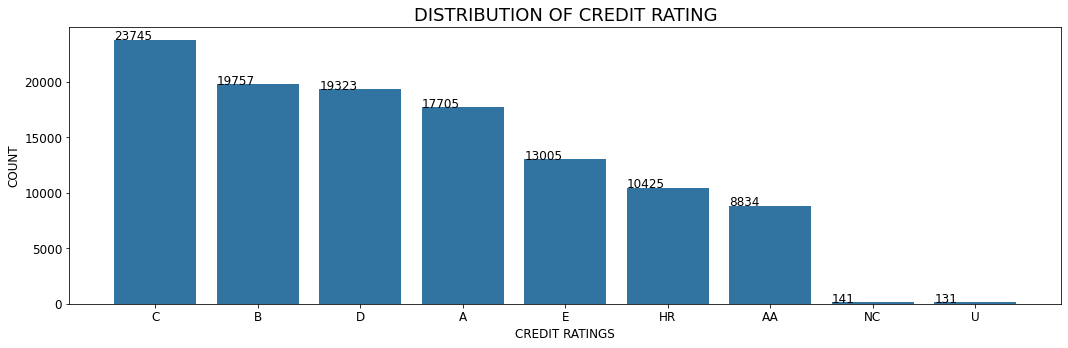

In [15]:
# Visualize this data with a count plot
bar_chart(loanData_cleaned, xa = 'CreditRating', color = blue, order=CreditRating_order, x_label = 'Credit Ratings', y_label = 'count', 
             title = 'Distribution of Credit rating');

## Duration of Loans
When plotted on a pie chart, we se that most people collect medium term loans. it is also obvious that not a lot of people are interested in short term loans. this could be as  a result of the accrued interest rate or it may not be enough time to pay back. 

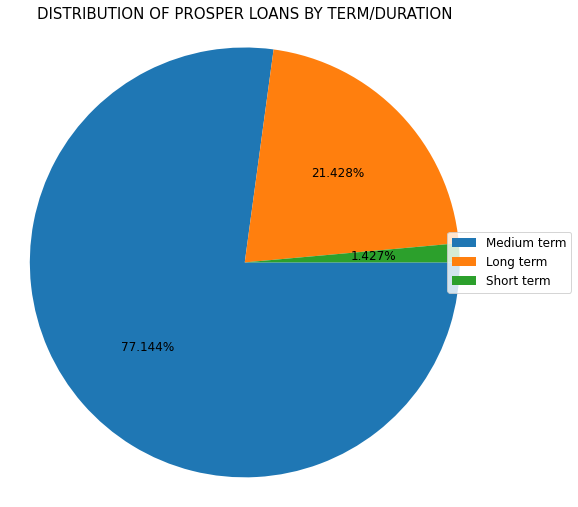

In [16]:
Term_counts = loanData_cleaned['Term'].value_counts()
pie_chart(Term_counts, title = "distribution of prosper loans by term/duration", title_fontsize = 15)

## Distribution of Loan by State

we see that most people that borrow money from Prosper loans live in Carlifonia, followed closely by Texas and then florida. this is understandable because carlifonia has the highest population in the united states, followed by Texas and then Florida. North Dakota has the smallest population in that list so again, it is understandable that the least number of borrowers live there.

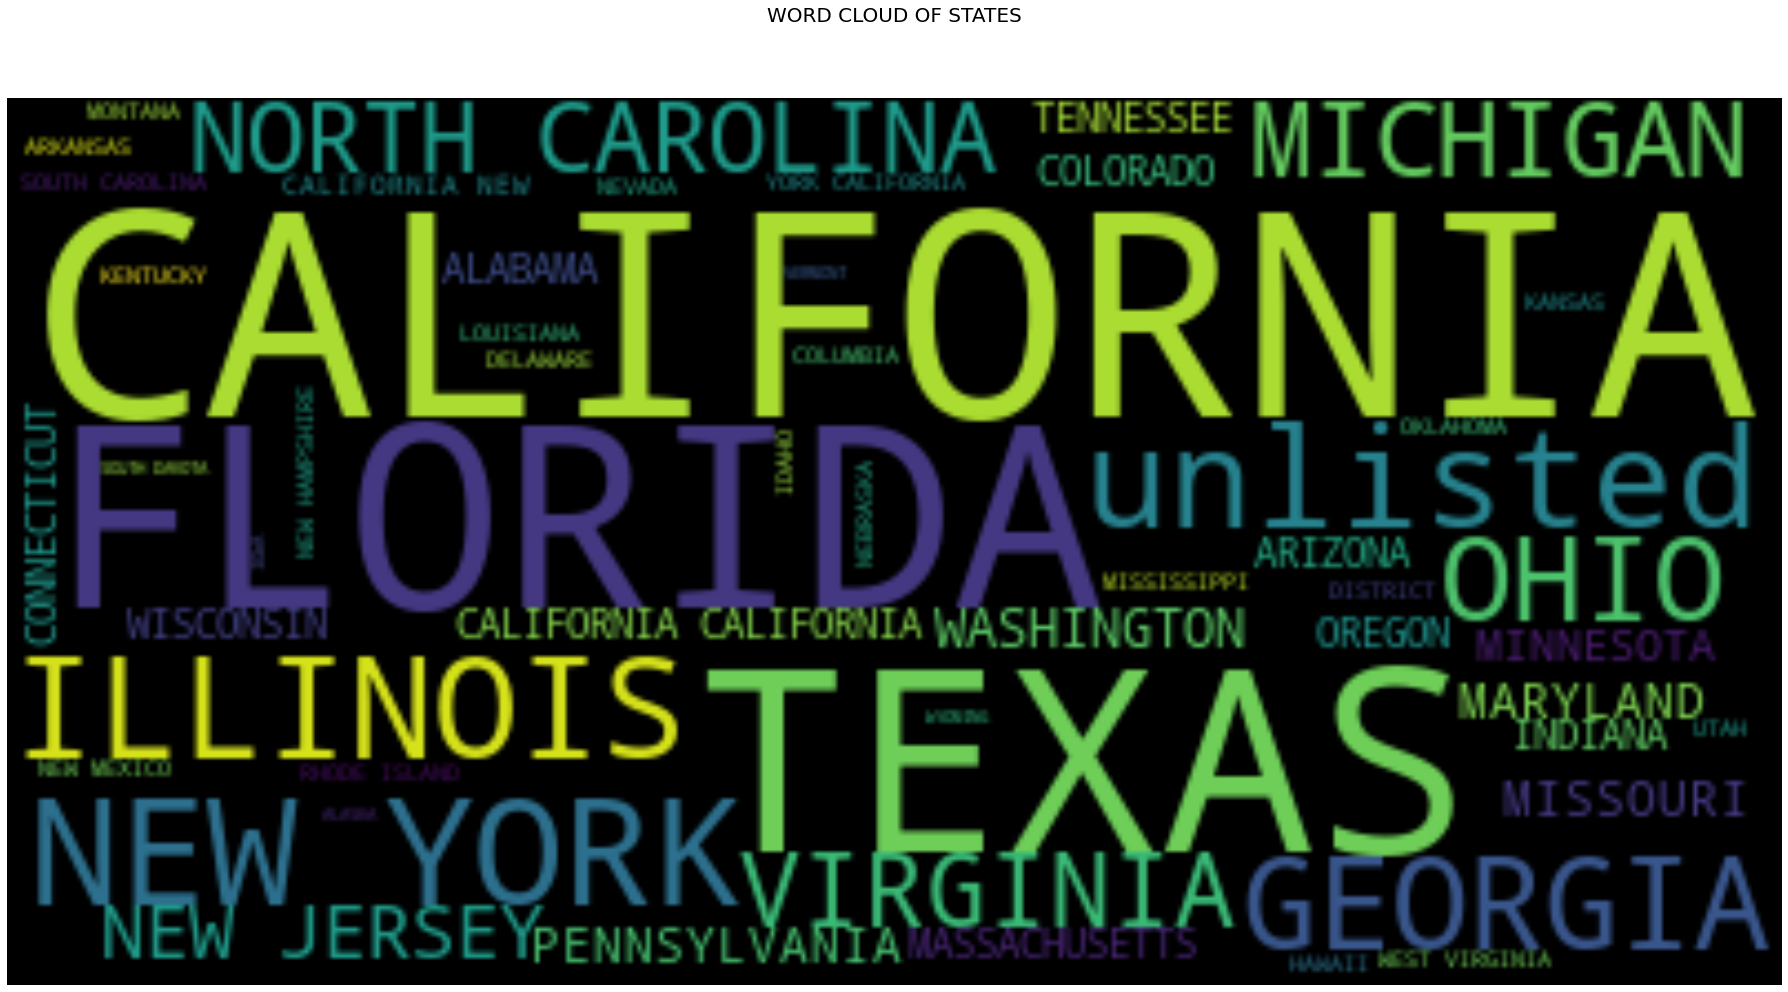

In [17]:
text = "".join(i for i in str(loanData_cleaned['BorrowerState']))
plot_word_count(text, max_pfont = 100, title = 'word cloud of states', pfont = 20, fig_size = (25,15))

## Relationship between Occupation and Estimated return

it looks like Prosper loans gets more estimated return on the loans from high end careers (like professionals, executives, etc) than those with low paying jobs. in the future, prosper loan ,may consider giving out loans more to this set of perople for better return on investment.

<Figure size 1080x720 with 0 Axes>

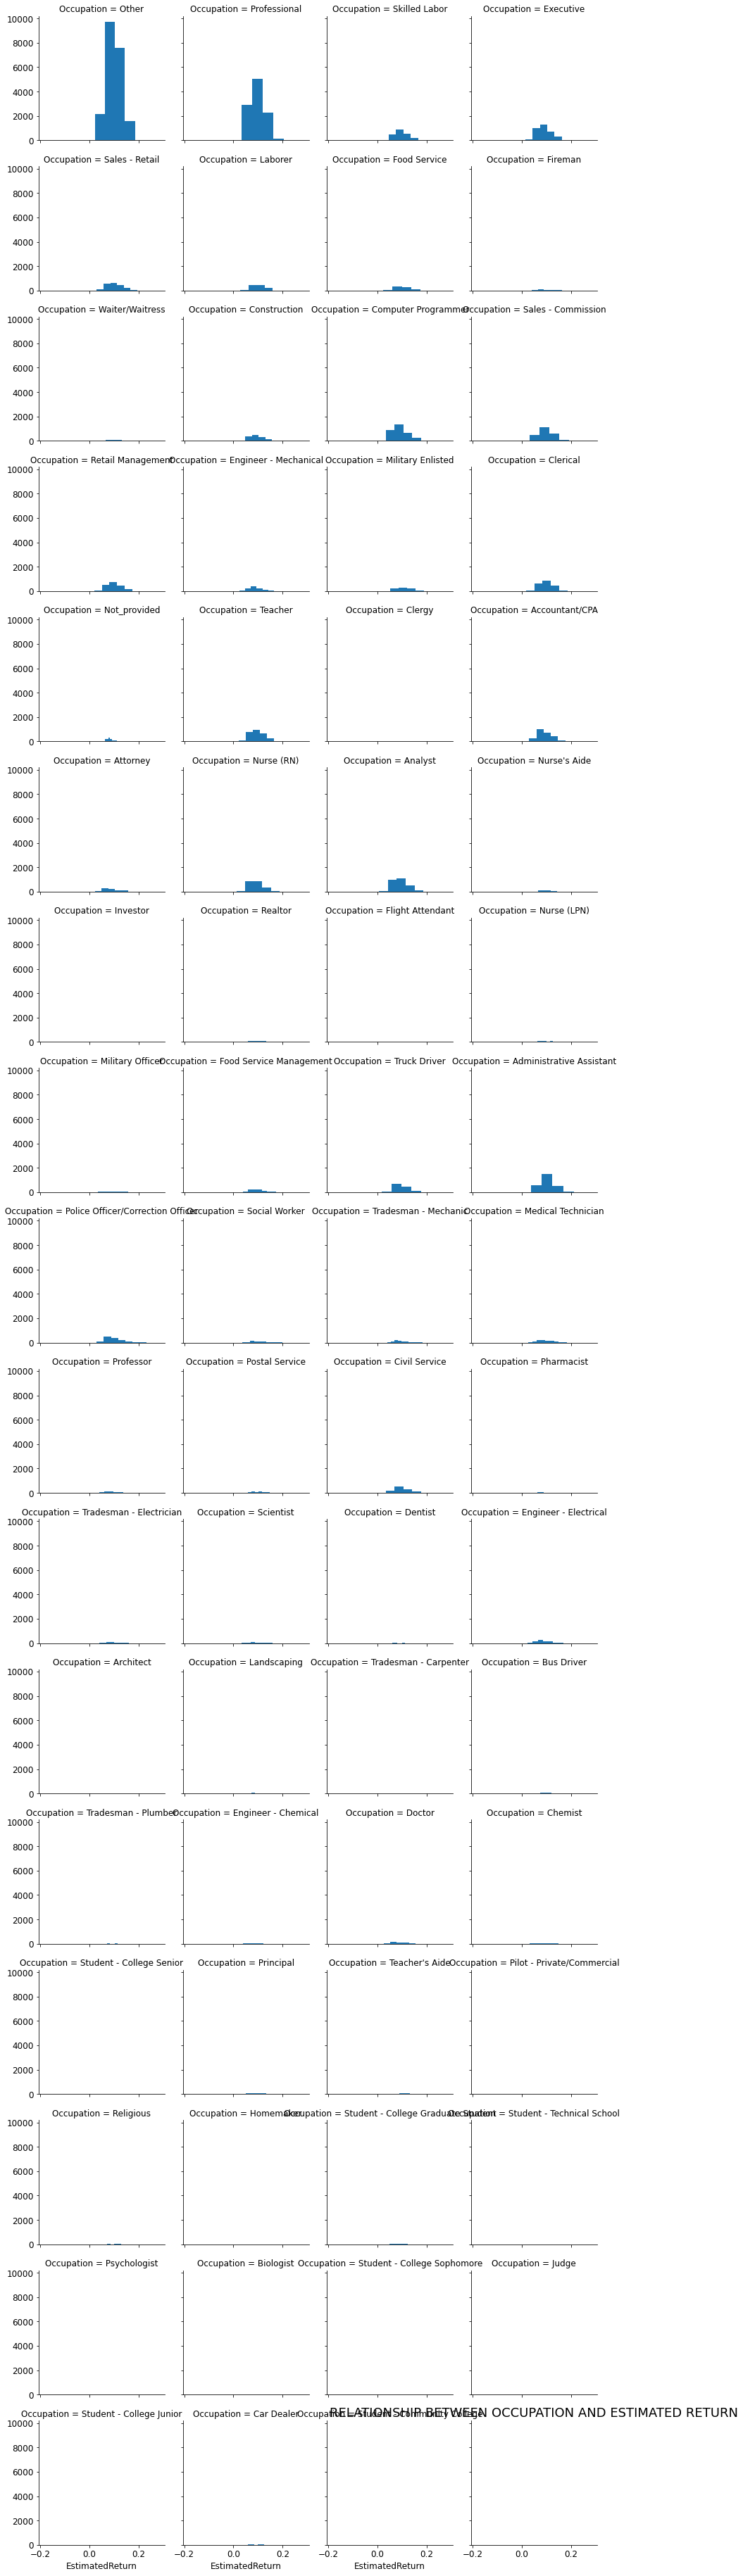

In [18]:
faceting(loanData_cleaned, xa = 'Occupation', ya = 'EstimatedReturn', 
         title = 'Relationship between occupation and estimated Return' )

## Borrower APR and Borrower Rate

from our plot, we can see a positive correlation. THis is expected as borrower APR (Annual Percentage rate) is simply total interest rate accrued over a year on a loan. prosper loans may consider giving out more medium term and long term loans as tehy will generate more APR for them.

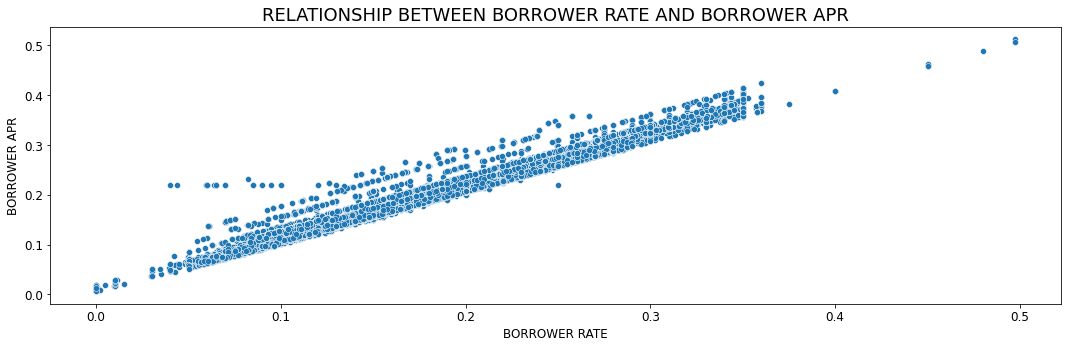

In [19]:
sb_scatter_plot(loanData_cleaned, xa = "BorrowerRate", x_label ='Borrower rate', ya = 'BorrowerAPR', y_label ='Borrower APR',
                title='Relationship between borrower rate and borrower apr', fig_size=(15,5) )

## Borrower APR over Time

when plotted on a line plot, we see a fluctuating relationship in borrower APR over time. there were noticable peaks within 2006, 2009 and 2011. I predict as more people borrower long and medium size loans, the borrower APR will increase again.

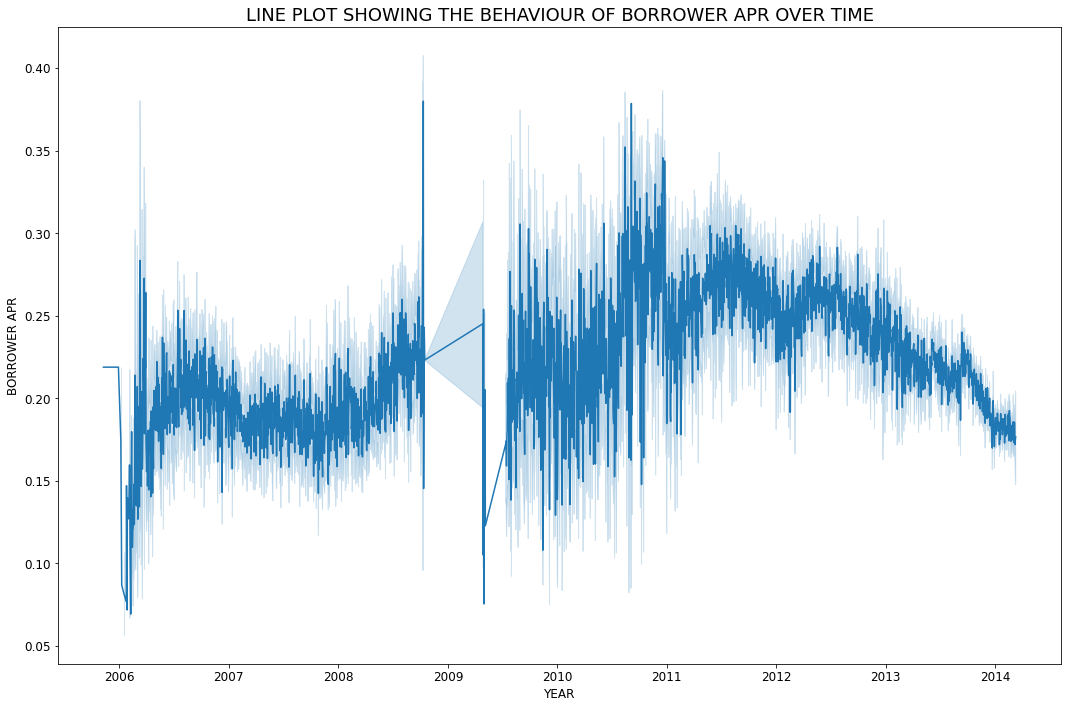

In [20]:
loanData_cleaned['ListingCreationDate'] = pd.to_datetime(loanData_cleaned['ListingCreationDate']).dt.date
line_plot(loanData_cleaned, xa = 'ListingCreationDate', ya = 'BorrowerAPR', 
          title = 'line plot showing the behaviour of borrower APR over time', x_label = 'year', y_label = 'Borrower APR')

## Distibution of Borrower APR

when plotted on a histochart, we notice a symmetrical and bimodal relationship.

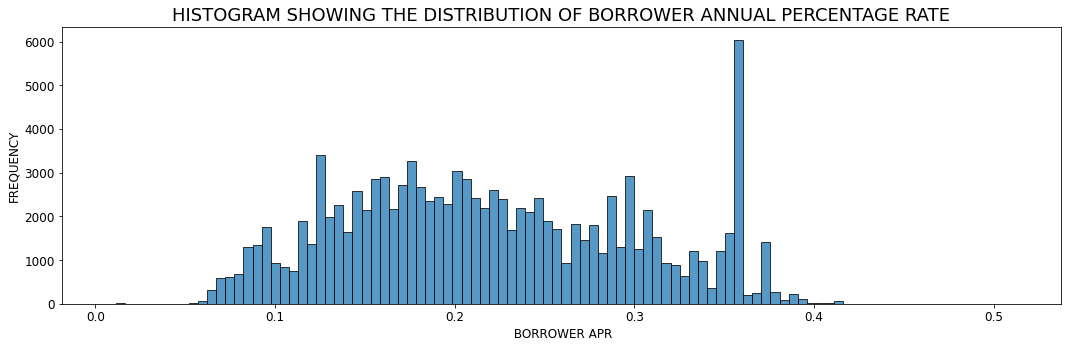

In [21]:
sb_histogram(loanData_cleaned, xa = 'BorrowerAPR', fig_size =(15,5), plot_bin_number = 100, x_label =" Borrower APR",
             title = 'Histogram showing the distribution of borrower annual percentage rate', y_label = 'frequency')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [22]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1834234 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_file